In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FMCD_y_MCM import mcd, mcm, mcd_3
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from scipy.fftpack import fft, fftfreq

importing Jupyter notebook from FMCD_y_MCM.ipynb
importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb


- - -
### Análisis de Fourier de señales periódicas de t-discreto
#### Conceptos básicos:

    1) Si la señal x(n) ES PERIÓDICA, entonces su espectro es su Serie de Fourier.


    2) Si la señal x(n) NO ES PERIÓDICA, entonces su espectro se obtiene a partir de la Transformada de Fourier.


    3) Si la señal x(n) ES ALEATORIA, entonces su espectro se obtiene a partir de la ESTIMACIÓN ESPECTRAL.


    4) Np = Fs/F es período en muestras de la señal (número de muestras por ciclo - de la señal períodica -).


    5) No confundir Np con N (número total puntos muestreados). Normalmente N > Np y la relación Fs/N se llama resolución espectral (número de frecuencias por cada Hz).


    6) El espectro de Fourier (S o T) de una señal x(n) es periódico sin importar si x(n) es periódica o no.


n: contador de las muestras
- - -

### Ejemplo Nº1: Análisis de Fourier de la señal x1(n)=cos(2π (40/120) n)

Fs = 120 Hz

F0 = 40 (frecuencia de la señal)

In [2]:
t = np.arange(0,10,0.001)
F0 = 40 #frecuencia de la señal
xa = np.cos(2*np.pi*F0*t)


#MUESTREAMOS
N1 = 60 #número total de muestras (cantidad de puntos)
n = np.arange(N1) #contador de las muestras
Fs = 120 #frecuencia de muestreo
x1 = np.cos(2*np.pi*(F0/Fs)*n) #señal muestreada

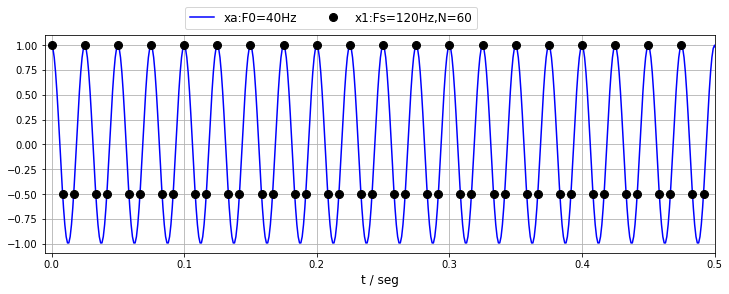

In [3]:
plt.figure(figsize=(12,4))
plt.plot(t,xa, 'b')
plt.plot(n/Fs,x1, 'ok',ms=8)
plt.xlim(-0.005,0.5)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('xa:F0=40Hz','x1:Fs=120Hz,N=60'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

Fs / F0 = 3 --> 3 muestras por ciclo

### Calculamos el espectro de la señal (coeficientes de la Serie de Fourier)

### PARA UNA SEÑAL PERIÓDICA

In [4]:
c1 = Espectro(x1) #Espectro de la señal muestreada
p1 = np.arange(N1) #Contador en el dominio de la frecuencia

In [5]:
c1

array([-5.15212872e-16+0.00000000e+00j,  3.98986399e-17-1.34007389e-16j,
       -1.27502175e-16-7.39425882e-17j, -2.75387352e-16-2.68882139e-17j,
       -5.09575021e-17+2.34187669e-17j,  8.32667268e-17+6.93889390e-17j,
       -9.32413868e-17-8.93382590e-17j, -1.16226473e-16+6.89552582e-17j,
       -5.98479599e-17+2.40692882e-17j, -1.60461922e-17+1.42247325e-16j,
       -6.52256027e-16-3.29402463e-17j, -1.27935856e-16-5.16080234e-16j,
       -1.73472348e-18-1.56992475e-16j,  3.71013983e-16-2.15539392e-16j,
        6.41847686e-17+3.65159292e-16j, -1.54682909e-16-1.46264402e-16j,
       -1.25767452e-16+6.50521303e-17j,  5.72458747e-17-4.85288892e-16j,
       -2.43728648e-16+3.32199546e-16j, -4.21104124e-16-7.70217223e-16j,
        5.00000000e-01-1.51792204e-15j,  8.17488438e-16+6.67001177e-16j,
       -3.50305722e-16+4.13948389e-16j,  8.74951153e-17+4.48642859e-16j,
       -7.80625564e-17+9.36750677e-17j, -4.30211422e-16-1.11022302e-16j,
       -1.03866568e-15+3.44342610e-16j,  9.17668719

In [6]:
#FILTRAMOS EL ESPECTRO, para que todos los puntos sean muy pequeños, los filtramos
for i in p1:
    if (abs(c1.real[i])<0.001):
        c1.real[i]=0
    if (abs(c1.imag[i])<0.001):
        c1.imag[i]=0

In [7]:
#PARA VER CÓMO SE MODIFICO C1
c1

array([0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j])

        Fs/N1 ES LA RESOLUCIÓN ESPECTRAL

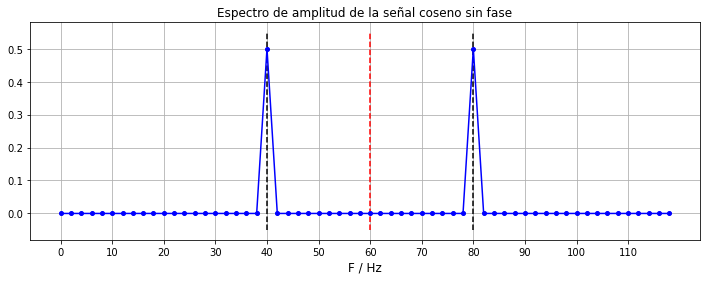

In [10]:
#ESPECTRO DE AMPLITUD

xlv = np.array([F0,Fs-F0]) #Líneas Verticales
plt.figure(figsize=(12,4))

plt.plot(p1*(Fs/N1),abs(c1), '.-',color='b',ms=8)

plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs/2,-0.05,0.55, linestyles='dashed',color='r')

plt.xticks(np.arange(0,120,10))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal coseno sin fase')
plt.grid(True)
plt.show()

De 0 a Fs=60 es el espectro útil, después es un plegado de lo mismo.

In [11]:
#RESOLUCIÓN ESPECTRAL

Fs/N1

2.0

Distancia entre punto y punto es igual a 2 Hz. Es decir que cada 2 Hz hay un punto.

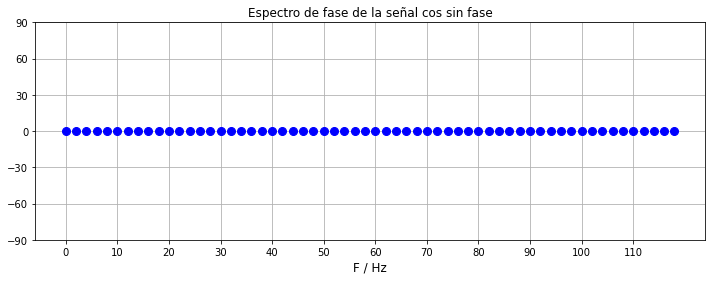

In [13]:
#ESPECTRO DE LA FASE

xlv = np.array([F0,Fs-F0])
plt.figure(figsize=(12,4))
plt.plot(p1*(Fs/N1),np.angle(c1)*180/np.pi, 'o',color='b',ms=8)

plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs/2,-0.05,0.55, linestyles='dashed',color='r')

plt.xticks(np.arange(0,120,10))
plt.yticks(np.arange(-90,120,30))

plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

- - -    
    Observaciones:
    (1) El espectro llega hasta Fs.
    (2) El espectro útil llega hasta Fs/2. Desde Fs/2 hasta Fs el espectro es una copia especular respecto a Fs/2 del espectro útil.
    (3) La resolución espectral es Fs/N1 = 120/60 = 2.
- - -

### Densidad espectral de potencia

In [19]:
C1 = c1*np.conjugate(c1) 
#El espectro por su conjugado para sacar la densidad espectral de potencia

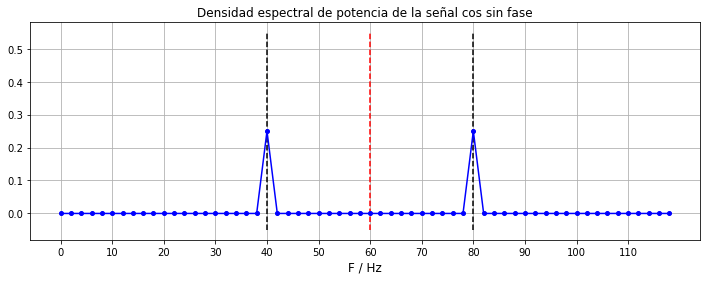

In [21]:
xlv = np.array([F0,Fs-F0])
plt.figure(figsize=(12,4))
plt.plot(p1*(Fs/N1),abs(C1), '.-',color='b',ms=8)

plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs/2,-0.05,0.55, linestyles='dashed',color='r')

plt.xticks(np.arange(0,120,10))

plt.xlabel('F / Hz', fontsize=12)
plt.title('Densidad espectral de potencia de la señal cos sin fase')
plt.grid(True)
plt.show()

- - -

### Espectro de la señal x1 empleando el módulo "scipy"

### PARA UNA SEÑAL PERIÓDICA

In [14]:
X1 = fft(x1)/N1 #Calcula el espectro
#N1 cantidad de puntos de muestreo
frq1 = fftfreq(N1,1/Fs) #Calcula la frecuencia
#Número de puntos y el período de muestreo
n1 = np.arange(len(X1))
#Contador

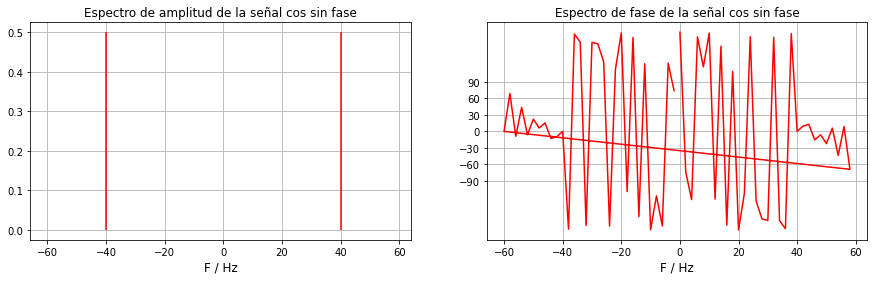

In [15]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.vlines(frq1,0,abs(X1),color='r') #espectro de línea
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal cos sin fase')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(frq1,np.angle(X1)*180/np.pi,color='r')
plt.yticks(np.arange(-90,120,30))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

La parte de la fase da horrible por eso necesitamos un filtrado.

In [16]:
#FILTRADO

for i in n1:
    if (abs(X1.real[i])<0.001):
        X1.real[i]=0
    if (abs(X1.imag[i])<0.001):
        X1.imag[i]=0

In [17]:
X1

array([0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j])

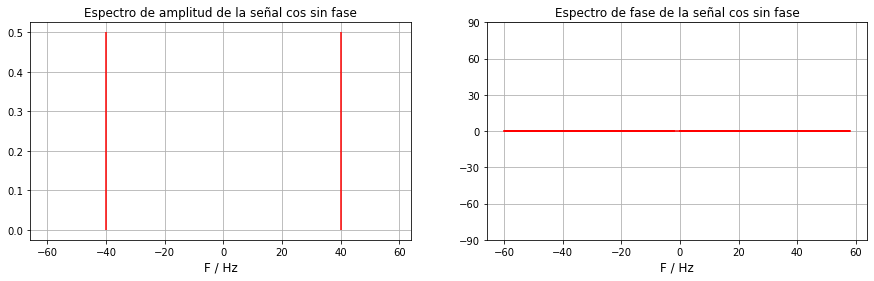

In [18]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.vlines(frq1,0,abs(X1),color='r') #espectro de línea
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal cos sin fase')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(frq1,np.angle(X1)*180/np.pi,color='r')
plt.yticks(np.arange(-90,120,30))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

- - -

### Tarea para la casa:
### Ejemplo Nº2: Análisis de Fourier de la señal: 

### x2(n) = cos(2π (40/120) n + π/4)


In [36]:
t2 = np.arange(0,10,0.001)
F_2 = 40 #frecuencia de la señal
x2 = np.cos( (2*np.pi*F_2*t2) + (np.pi/4) )

#MUESTREAMOS
N2 = 60 #número total de muestras (cantidad de puntos)
n2 = np.arange(N2) #contador de las muestras
Fs2 = 120 #frecuencia de muestreo
X2 = np.cos((2*np.pi*(F_2/Fs2)*n2) + (np.pi/4)) #señal muestreada

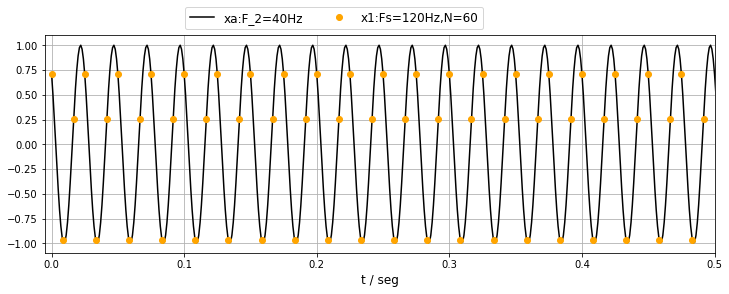

In [37]:
plt.figure(figsize=(12,4))
plt.plot(t2,x2, color='black')
plt.plot(n2/Fs2,X2, 'o',color="orange",ms=6)
plt.xlim(-0.005,0.5)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('xa:F_2=40Hz','x1:Fs=120Hz,N=60'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

In [38]:
X_2 = fft(x2)/N2 #Calcula el espectro
#N1 cantidad de puntos de muestreo
frq2 = fftfreq(N2,1/Fs2) #Calcula la frecuencia
#Número de puntos y el período de muestreo
n2 = np.arange(len(X_2))
#Contador

In [39]:
#FILTRADO

for i in n2:
    if (abs(X_2.real[i])<0.001):
        X_2.real[i]=0
    if (abs(X_2.imag[i])<0.001):
        X_2.imag[i]=0

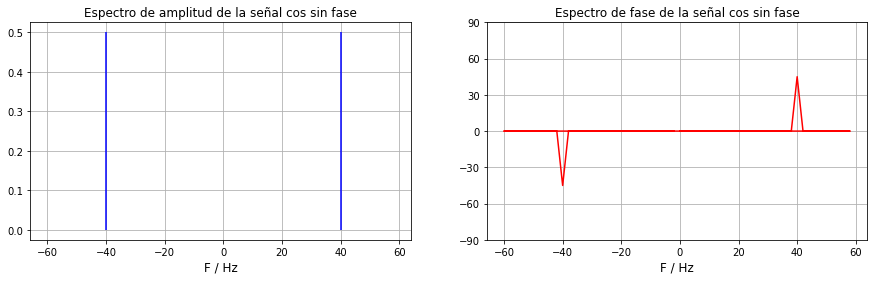

In [23]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.vlines(frq1,0,abs(X1),color='blue') #espectro de línea
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal cos sin fase')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(frq1,np.angle(X1)*180/np.pi,color='r')
plt.yticks(np.arange(-90,120,30))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

### x3(n) = 2 sin(2π (20/100) n)

In [89]:
t3 = np.arange(0,10,0.001)
F_3 = 20 #frecuencia de la señal
x3 = 2*np.sin( (2*np.pi*F_3*t3) )

#MUESTREAMOS
N3 = 60 #número total de muestras (cantidad de puntos)
n3 = np.arange(N3) #contador de las muestras
Fs3 = 100 #frecuencia de muestreo
X3 = 2*np.sin( (2*np.pi*(F_3/Fs3)*n3) ) #señal muestreada

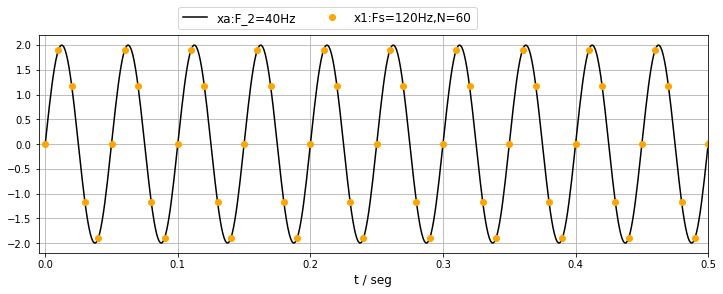

In [91]:
plt.figure(figsize=(12,4))
plt.plot(t3,x3, color='black')
plt.plot(n3/Fs3,X3, 'o',color="orange",ms=6)
plt.xlim(-0.005,0.5)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('xa:F_2=40Hz','x1:Fs=120Hz,N=60'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

In [95]:
X1 = fft(X3)/N3 
#N1 cantidad de puntos de muestreo
frq1 = fftfreq(N3,1/Fs3) 
#Número de puntos y el período de muestreo
n1 = np.arange(len(X1))

In [96]:
#FILTRAMOS EL ESPECTRO, para que todos los puntos sean muy pequeños, los filtramos

for i in n1:
    if (abs(X1.real[i])<0.001):
        X1.real[i]=0
    if (abs(X1.imag[i])<0.001):
        X1.imag[i]=0

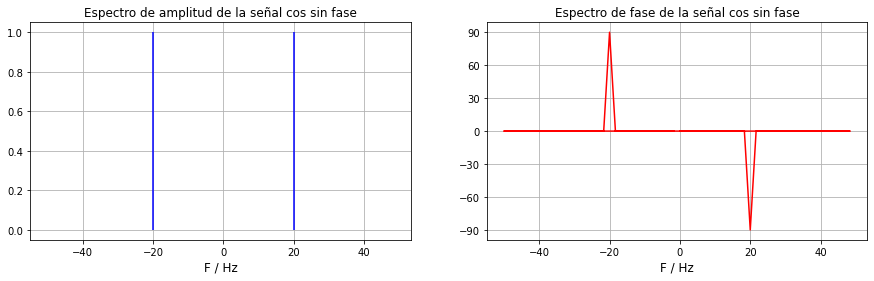

In [97]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.vlines(frq1,0,abs(X1),color='blue') #espectro de línea
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal cos sin fase')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(frq1,np.angle(X1)*180/np.pi,color='r')
plt.yticks(np.arange(-90,120,30))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

### x4(n) = 2 sin(2π (20/100) n + π/6)

In [101]:
t4 = np.arange(0,10,0.001)
F_4 = 20 #frecuencia de la señal
x4 = 2*np.sin( (2*np.pi*F_4*t4) + (np.pi/6) )

#MUESTREAMOS
N4 = 60 #número total de muestras (cantidad de puntos)
n4 = np.arange(N4) #contador de las muestras
Fs4 = 100 #frecuencia de muestreo
X4 = 2*np.sin( (2*np.pi*(F_4/Fs4)*n4) + (np.pi/6) ) #señal muestreada

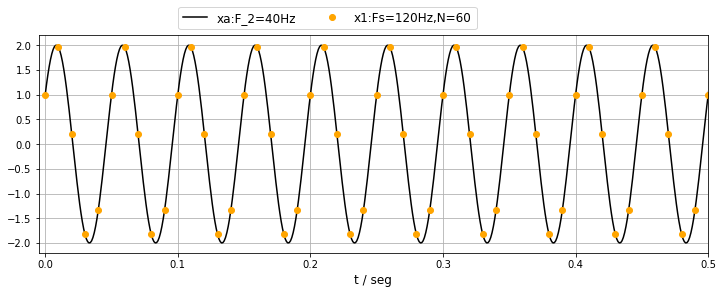

In [102]:
plt.figure(figsize=(12,4))
plt.plot(t4,x4, color='black')
plt.plot(n4/Fs4,X4, 'o',color="orange",ms=6)
plt.xlim(-0.005,0.5)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('xa:F_2=40Hz','x1:Fs=120Hz,N=60'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

In [103]:
X1 = fft(X4)/N4 
#N1 cantidad de puntos de muestreo
frq1 = fftfreq(N4,1/Fs4) 
#Número de puntos y el período de muestreo
n1 = np.arange(len(X1))

In [104]:
#FILTRAMOS EL ESPECTRO, para que todos los puntos sean muy pequeños, los filtramos

for i in n1:
    if (abs(X1.real[i])<0.001):
        X1.real[i]=0
    if (abs(X1.imag[i])<0.001):
        X1.imag[i]=0

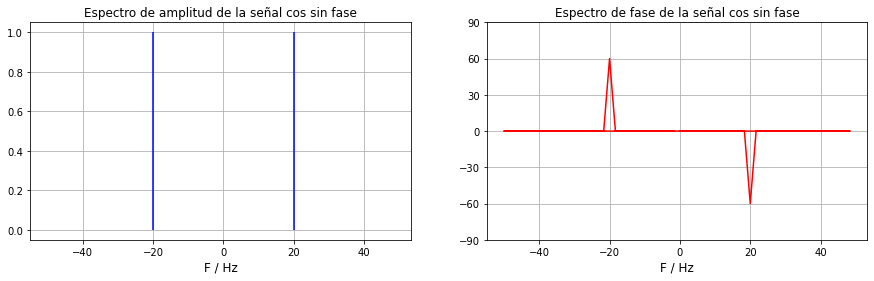

In [105]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.vlines(frq1,0,abs(X1),color='blue') #espectro de línea
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal cos sin fase')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(frq1,np.angle(X1)*180/np.pi,color='r')
plt.yticks(np.arange(-90,120,30))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

- - -

### Análisis de Fourier de la señal: x5(n) = cos(2π (3/60) n) + 2 cos(2π (8/60) n) + 3 sin(2π (12/60) n) con diferentes frecuencias de muestreo:

In [41]:
t = np.arange(0,25,0.001)
F1,F2,F3,Fs1,Fs2,Fs3 = 3, 8, 12, 60, 120, 1200
xa = np.cos(2*np.pi*F1*t) + 2*np.cos(2*np.pi*F2*t) + 3*np.sin(2*np.pi*F3*t)
N1 = 1200 #para que en el peor de los casos (Fs3=1200) tenga un ciclo de muestreo
n1 = np.arange(N1)
x1 = np.cos(2*np.pi*(F1/Fs1)*n1) + 2*np.cos(2*np.pi*(F2/Fs1)*n1) + 3*np.sin(2*np.pi*(F3/Fs1)*n1)
x2 = np.cos(2*np.pi*(F1/Fs2)*n1) + 2*np.cos(2*np.pi*(F2/Fs2)*n1) + 3*np.sin(2*np.pi*(F3/Fs2)*n1)
x3 = np.cos(2*np.pi*(F1/Fs3)*n1) + 2*np.cos(2*np.pi*(F2/Fs3)*n1) + 3*np.sin(2*np.pi*(F3/Fs3)*n1)

In [42]:
F = mcd_3(3,8,12)
print ("La frecuencia total de la señal es:",F)

La frecuencia total de la señal es: 1


### La cantidad de puntos por ciclo en cada caso es:

In [43]:
Fs1/F , Fs2/F , Fs3/F

(60.0, 120.0, 1200.0)

### La resolución espectral en cada caso es:

In [44]:
Fs1/N1,Fs2/N1,Fs3/N1

(0.05, 0.1, 1.0)

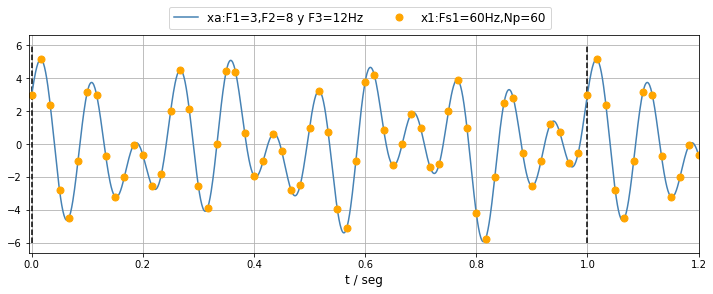

In [45]:
xlv = np.array([0,1])
plt.figure(figsize=(12,4))
plt.plot(t,xa, 'steelblue')
plt.plot(n1/Fs1,x1, 'o',color='orange',ms=7)

plt.vlines(xlv,-6,6,linestyles='dashed',color='k')

plt.xlim(-0.005,1.2)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('xa:F1=3,F2=8 y F3=12Hz','x1:Fs1=60Hz,Np=60'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

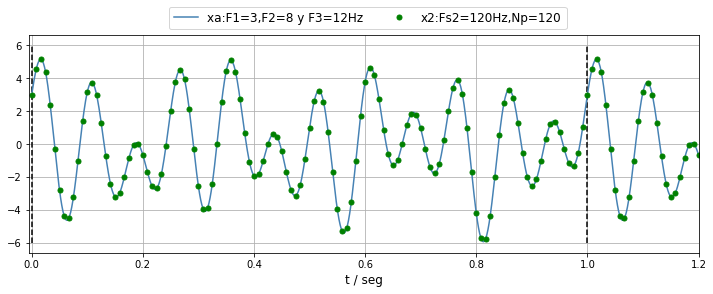

In [46]:
xlv = np.array([0,1])
plt.figure(figsize=(12,4))
plt.plot(t,xa, 'steelblue')
plt.plot(n1/Fs2,x2, 'o',color='g',ms=5)

plt.vlines(xlv,-6,6,linestyles='dashed',color='k')

plt.xlim(-0.005,1.2)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('xa:F1=3,F2=8 y F3=12Hz','x2:Fs2=120Hz,Np=120'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

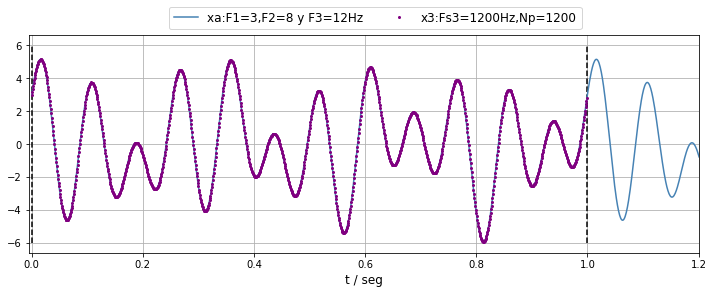

In [47]:
xlv = np.array([0,1])
plt.figure(figsize=(12,4))
plt.plot(t,xa, 'steelblue')
plt.plot(n1/Fs3,x3, 'o',color='purple',ms=2)

plt.vlines(xlv,-6,6,linestyles='dashed',color='k')

plt.xlim(-0.005,1.2)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('xa:F1=3,F2=8 y F3=12Hz','x3:Fs3=1200Hz,Np=1200'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

In [48]:
c1 = Espectro(x1)
c2 = Espectro(x2)
c3 = Espectro(x3)

p1 = np.arange(N1)

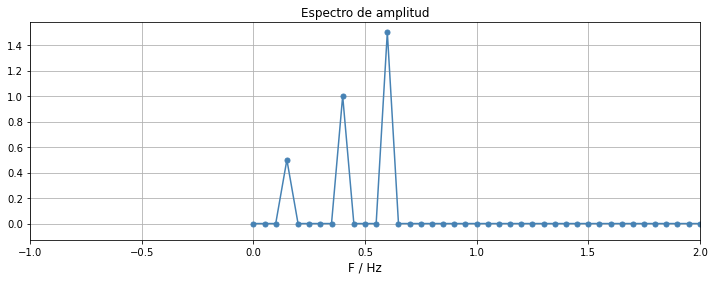

In [49]:
#c3 con Fs1 y N1

xlv = np.array([F1,F2,F3,Fs1-F1,Fs1-F2,Fs1-F3])
plt.figure(figsize=(12,4))
plt.plot(p1*(Fs1/N1),abs(c3), 'o-',color='steelblue',ms=5)
#plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs1/2,-0.05,1.4, linestyles='dashed',color='r')
#plt.xticks(np.array(0,3,8,20,30,40,60120,10))
plt.xlim(-1,2)
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud')
plt.grid(True)
plt.show()

### Tarea: representar los espectros con Fs2 y Fs3 y hacer el mismo ejemplo pero para diferentes cantidades de muestras: 
### N2 = 120 y N3 = 1200


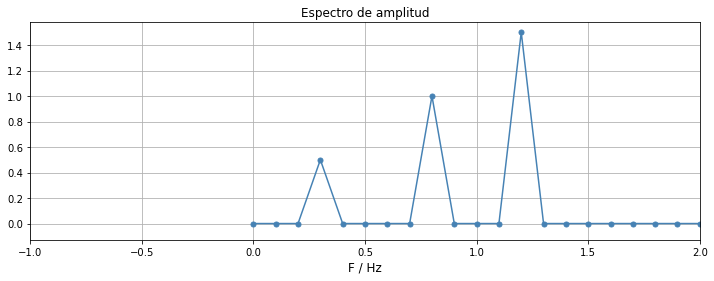

In [54]:
#c3 con Fs2 y N1

xlv = np.array([F1,F2,F3,Fs2-F1,Fs2-F2,Fs2-F3])
plt.figure(figsize=(12,4))
plt.plot(p1*(Fs2/N1),abs(c3), 'o-',color='steelblue',ms=5)
#plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs2/2,-0.05,1.4, linestyles='dashed',color='r')
#plt.xticks(np.array(0,3,8,20,30,40,60120,10))
plt.xlim(-1,2)
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud')
plt.grid(True)
plt.show()

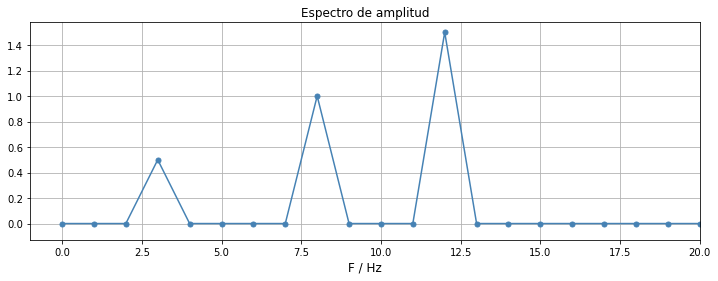

In [55]:
#c3 con Fs3 y N1

xlv = np.array([F1,F2,F3,Fs3-F1,Fs3-F2,Fs3-F3])
plt.figure(figsize=(12,4))
plt.plot(p1*(Fs3/N1),abs(c3), 'o-',color='steelblue',ms=5)
#plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs3/2,-0.05,1.4, linestyles='dashed',color='r')
#plt.xticks(np.array(0,3,8,20,30,40,60120,10))
plt.xlim(-1,20)
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud')
plt.grid(True)
plt.show()

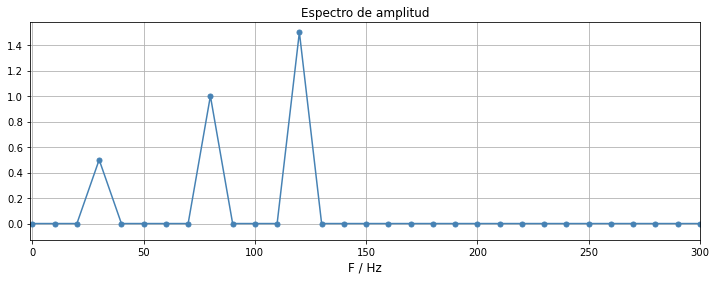

In [62]:
#c3 con Fs3 y N2

N2 = 120

xlv = np.array([F1,F2,F3,Fs3-F1,Fs3-F2,Fs3-F3])
plt.figure(figsize=(12,4))
plt.plot(p1*(Fs3/N2),abs(c3), 'o-',color='steelblue',ms=5)
#plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs3/2,-0.05,1.4, linestyles='dashed',color='r')
#plt.xticks(np.array(0,3,8,20,30,40,60120,10))
plt.xlim(-1,300)
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud')
plt.grid(True)
plt.show()

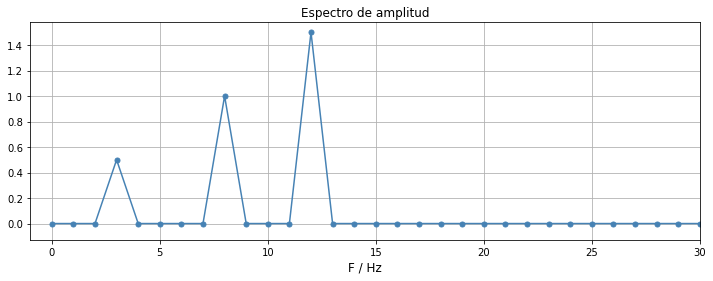

In [65]:
#c3 con Fs3 y N3

N3 = 1200

xlv = np.array([F1,F2,F3,Fs3-F1,Fs3-F2,Fs3-F3])
plt.figure(figsize=(12,4))
plt.plot(p1*(Fs3/N3),abs(c3), 'o-',color='steelblue',ms=5)
#plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs3/2,-0.05,1.4, linestyles='dashed',color='r')
#plt.xticks(np.array(0,3,8,20,30,40,60120,10))
plt.xlim(-1,30)
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud')
plt.grid(True)
plt.show()